## Introduction to the `tweezers` package

The idea of this series of notebooks is that of **live documentation**. This means:

* showing how common tasks are performed
* let the user play with the examples, and thus learning the syntax 

For this to work, a user should clone the `tweezers` repo, create a new branch, say **play**, and start working through the notebooks

Let's get started!!!

In [1]:
import tweezers
help(tweezers)

Help on package tweezers:

NAME
    tweezers - Package for data analysis of optical trap experiments

PACKAGE CONTENTS
    analysis (package)
    container
    debug
    io (package)
    ixo (package)
    meta
    physics (package)
    plot (package)
    simulation (package)
    utils (package)

FILE
    /Users/christophehrlich/Documents/Python/tweezers/tweezers/__init__.py




## Loading data

The common data format for tweezer data is `tweezers.TweezerData`. This class requires a data source object that should be inherited from `tweezers.io.BaseSource.BaseSource` (e.g. `tweezers.io.TxtSourceMpi`).
So just create an appropriate data source object for your input (txt files, simulation - whatever) and pass it on to the data object.
You can inspect the data object and look e.g. at its `meta` and `units` property.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib as mpl
import seaborn as sns

from tweezers.io import TxtBiotecSource
from tweezers import TweezersData
from tweezers.plot.psd import PsdPlot, PsdFitPlot
from tweezers.io import getAllIds, loadIds, loadSegments
from tweezers.plot.interactive import CollectionPlot, SegmentSelector

# plotting options
sns.set_context('poster')
params = {'figure.figsize': (8.0, 5.0)}
mpl.rcParams.update(params)

pathData = '../tweezers/data/2017-01-13_16-32-24 FUSpolyN #012-000 DATA.txt'
pathPsd = '../tweezers/data/2017-01-13_16-32-24 FUSpolyN #012 PSD.txt'

source = TxtBiotecSource(data=pathData, psd=pathPsd)
td = TweezersData(source)

One can also load all datasets in a certain path. This will return a `tweezers.TweezersCollection`.

In [2]:
path = '../tweezers/data/'
ids = getAllIds(path)
tc = loadIds(ids)

## Looking at the data

In the example below, the data container is taken as it is and the PSDs and their fits are plotted. PSDs and fits in this case come from LabView.

### Showing meta- and raw data

In [16]:
td.meta.print()
td.units.print()

MetaDict([('aodX',
           MetaDict([('beadDiameter', 2),
                     ('cornerFrequency', 432.301456770868),
                     ('diffusionCoefficient', 0.03418169926055),
                     ('displacementSensitivity', 1303.3086212783),
                     ('distanceCalibIntercept', -15968.010715),
                     ('distanceCalibSlope', 83346.896893),
                     ('fitResidual', 1.31746171365103e-19),
                     ('forceSensitivity', 250.982640425064),
                     ('stiffness', 0.192573452156632),
                     ('varCornerFrequency', 6.71330122087896e+19),
                     ('varDiffusionCoefficient', 1020898063366.94),
                     ('zeroOffset', 0.298842802871949)])),
          ('aodY',
           MetaDict([('beadDiameter', 2),
                     ('cornerFrequency', 354.727397551341),
                     ('diffusionCoefficient', 0.0271028094965719),
                     ('displacementSensitivity', 1463.6489861904),

In [17]:
td.data.head()

,time,pmXDiff,pmXSum,pmYDiff,pmYSum,aodXDiff,aodXSum,aodYDiff,aodYSum,pmXTrap,...,absTime,aodXForce,aodYForce,pmXForce,pmYForce,xForce,yForce,xDist,yDist,distance
0,0.000000,0.134522,-1.114655,0.183806,1.218056,0.302854,-1.942642,0.041717,1.974069,33300.649584,...,3.567166e+09,1.006741,0.134359,-0.413416,1.086940,0.296662,0.476290,-52.142098,4580.114156,4580.410951
1,0.000999,0.134121,-1.098419,0.184350,1.232739,0.299363,-1.949078,0.041893,1.963693,33300.265187,...,3.567166e+09,0.130560,0.175065,-0.516004,0.943160,-0.192722,0.384048,-52.142098,4580.114156,4580.410951
2,0.001999,0.132024,-1.113598,0.187793,1.224813,0.302085,-1.954570,0.039812,1.958618,33300.210273,...,3.567166e+09,0.813735,-0.306233,-1.052477,0.033174,-0.119371,0.169703,-52.142098,4580.114156,4580.410951
3,0.002999,0.133737,-1.107370,0.188994,1.231634,0.302485,-1.959022,0.040036,1.962396,33300.045532,...,3.567166e+09,0.914128,-0.254426,-0.614242,-0.284251,0.149943,-0.014913,-52.142098,4580.114156,4580.410951
4,0.003999,0.132600,-1.112894,0.189170,1.233427,0.296193,-1.952441,0.041141,1.961836,33300.429929,...,3.567166e+09,-0.665055,0.001141,-0.905120,-0.330768,-0.785087,-0.165954,-52.142098,4580.114156,4580.410951


### Plotting

<IPython.core.display.Javascript object>


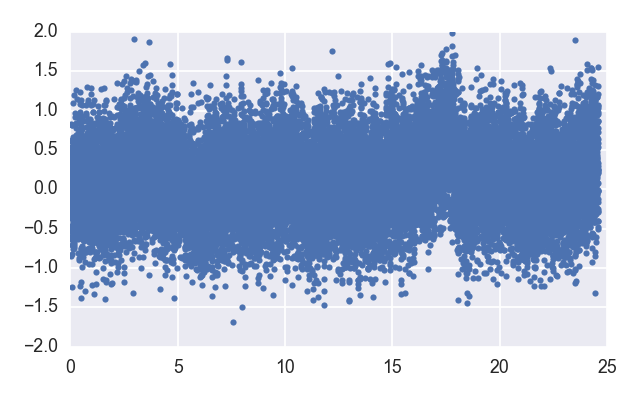

In [3]:
def plot(td, ax):
    ax.plot(td.data.time, td.data.yForce, '.')
    
CollectionPlot(tc, plot)

<IPython.core.display.Javascript object>


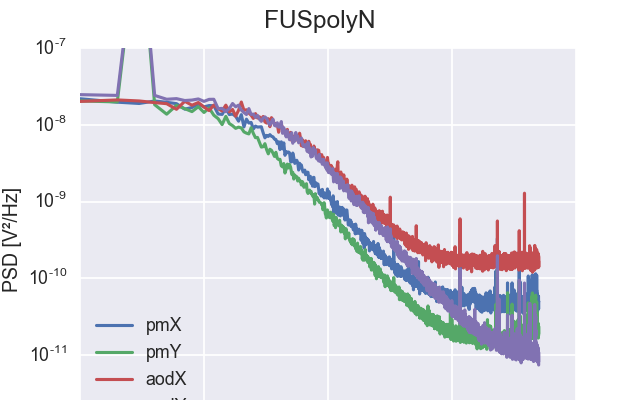

INFO:root:Units: Default metadata value used for key: psd


In [4]:
psdPlot = PsdPlot(td)

<IPython.core.display.Javascript object>


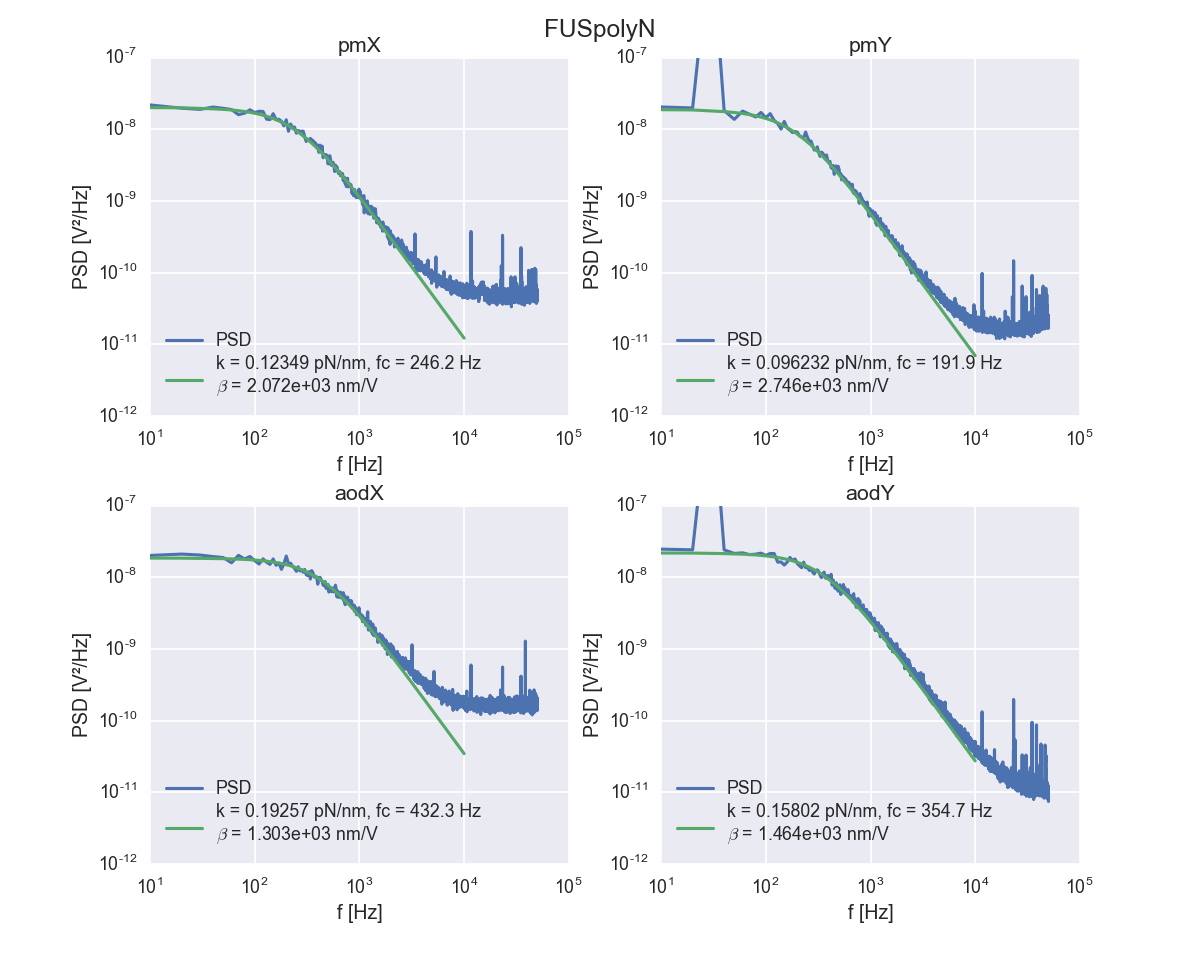

INFO:root:Units: Default metadata value used for key: psd
INFO:root:Units: Default metadata value used for key: psd
INFO:root:Units: Default metadata value used for key: psd
INFO:root:Units: Default metadata value used for key: psd


In [5]:
PsdFitPlot(td)

## Analyse the data

Here, the data is analysed which could be necessary if the corresponding quantities are not given in the data source or should just be recomputed.

### Segment selection

One can define segments of interest in the data.

<IPython.core.display.Javascript object>


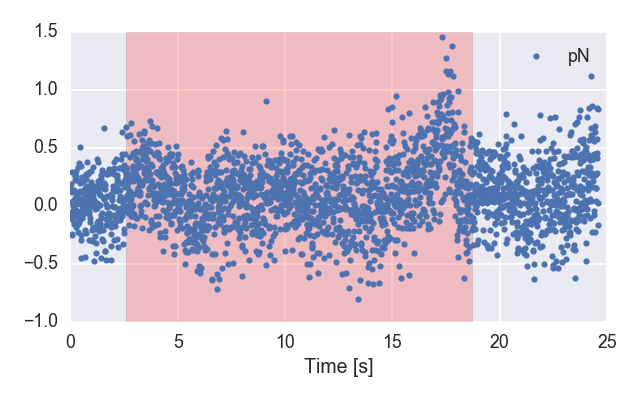

In [6]:
SegmentSelector(tc)

Segments can be loaded using `loadSegments`. A segment object behaves the same as a data object.

In [6]:
ts = loadSegments(tc)
ts[0][0].data.head()

,time,pmXDiff,pmXSum,pmYDiff,pmYSum,aodXDiff,aodXSum,aodYDiff,aodYSum,pmXTrap,...,absTime,aodXForce,aodYForce,pmXForce,pmYForce,xForce,yForce,xDist,yDist,distance
0,0.000,0.134618,-1.106873,0.183246,1.223564,0.294640,-1.935596,0.039652,1.964606,33300.594670,...,3.567166e+09,-1.054831,-0.343238,-0.388857,1.234948,-0.721844,0.789093,-52.77811,3954.471495,3954.823679
1,0.001,0.136795,-1.103959,0.188193,1.218888,0.291437,-1.933611,0.044679,1.958425,33300.759412,...,3.567166e+09,-1.858728,0.819416,0.168083,-0.072546,-0.845323,-0.445981,-52.77811,3954.471495,3954.823679
2,0.002,0.134634,-1.109307,0.185295,1.225581,0.294800,-1.946452,0.042966,1.946176,33300.594670,...,3.567166e+09,-1.014673,0.423230,-0.384764,0.693396,-0.699718,0.135083,-52.77811,3954.471495,3954.823679
3,0.003,0.136107,-1.120083,0.186384,1.218376,0.291197,-1.945924,0.041461,1.955495,33300.539756,...,3.567166e+09,-1.918964,0.075151,-0.007928,0.405573,-0.963446,0.165211,-52.77811,3954.471495,3954.823679
4,0.004,0.134938,-1.108042,0.185167,1.224429,0.292782,-1.935356,0.037586,1.958393,33300.649584,...,3.567166e+09,-1.521156,-0.821066,-0.306992,0.727227,-0.914074,0.774146,-52.77811,3954.471495,3954.823679


Analysis results can be stored in the `analysis` dictionary of a data object and be written back to disk.

In [9]:
ts[0][0].analysis['result'] = 'new science'
ts[0][0].save()